In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, \
accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LassoCV
plt.rcParams['figure.figsize']= (20,8)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df = df.drop(['Unnamed: 32'], axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.diagnosis.value_counts(normalize = True)


B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
df = df.replace({'B': 0, 'M':1})

In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


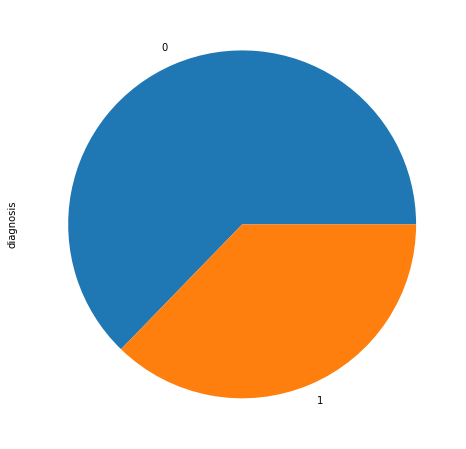

In [ ]:
df.diagnosis.value_counts().plot(kind="pie")
plt.show()

In [ ]:
df.set_index('id', inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
## Let's drop our target variable
X = df.drop(["diagnosis"],1)   #Feature Matrix
y = df["diagnosis"]  #Target Variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
import xgboost as xgb


In [ ]:
import time
starttime= time.process_time()

xgb_class = xgb.XGBClassifier(max_depth=5, n_estimators=100)
xgb_class.fit(X_train,y_train)
pred = xgb_class.predict(X_test)

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by XGBoost is" ,(totaltime),'seconds')

Total time taken by XGBoost is 1.455906186 seconds


In [ ]:


from sklearn.metrics import accuracy_score, recall_score, precision_score

acc = accuracy_score(y_test,pred)
print(f'Accuracy of model is',acc*100)

recall = recall_score(y_test,pred)
print(f'Recall of model is',recall*100)

prec = precision_score(y_test,pred)
print(f'Precision of model is',prec*100)

f1 = f1_score(y_test,pred)
print(f'F1 Score of model is', f1*100)

Accuracy of model is 95.6140350877193
Recall of model is 93.02325581395348
Precision of model is 95.23809523809523
F1 Score of model is 94.11764705882352


AdaBoost
AdaBoost (Adaptive Boosting) is a boosting algorithm that was first introduced in 1995. It is a popular algorithm used for binary classification, but it can also be extended to multiclass problems.

*AdaBoost works by iteratively training weak learners on different subsets of the training data and adjusting the weights of the training examples to emphasize the examples that are misclassified by the current set of weak learners. It combines the output of the weak learners to create a strong classifier that is capable of accurately classifying new data.*


In [ ]:
from sklearn.ensemble import AdaBoostClassifier 


In [ ]:
import time
starttime= time.process_time()

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train) 
preds = ada.predict(X_test)

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by Adaboost is" ,(totaltime),'seconds')

from sklearn.metrics import accuracy_score, recall_score, precision_score

acc = accuracy_score(y_test,preds)
print(f'Accuracy of model is',acc*100)

recall = recall_score(y_test,preds)
print(f'Recall of model is',recall*100)

prec = precision_score(y_test,preds)
print(f'Precision of model is',prec*100)

f1 = f1_score(y_test,preds)
print(f'F1 Score of model is', f1*100)

Total time taken by Adaboost is 0.41197075799999894 seconds
Accuracy of model is 97.36842105263158
Recall of model is 95.34883720930233
Precision of model is 97.61904761904762
F1 Score of model is 96.47058823529412


In [ ]:
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
842517,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
84300903,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
84348301,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
84358402,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


Feature Engineering using Lasso CV
Lasso CV stands for Lasso cross-validation, which is a machine learning technique used for feature selection and regularization in linear regression models.

In [ ]:
X_new = data_scaled.drop(["diagnosis"],1)   #Feature Matrix
y_new = data_scaled["diagnosis"]  #Target Variable

reg = LassoCV()
reg.fit(X_new, y_new)


print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_new,y_new))
coef = pd.Series(reg.coef_, index = X_new.columns)

Best alpha using built-in LassoCV: 0.000087
Best score using built-in LassoCV: 0.772674


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 23 variables and eliminated the other 7 variables


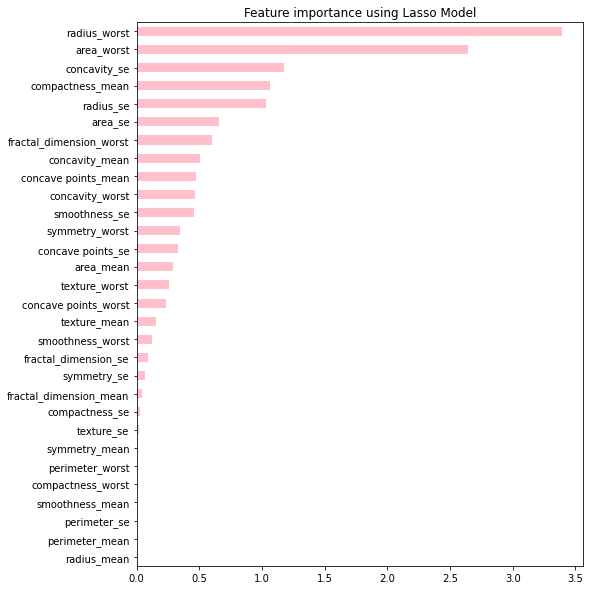

In [ ]:
imp_coef = coef.abs().sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh", color= 'pink')
plt.title("Feature importance using Lasso Model")
plt.show()

In [ ]:
X_star = X_new.drop(['radius_mean', 'perimeter_mean', 'perimeter_se', 'smoothness_mean', 'compactness_worst', 'symmetry_mean', 'texture_se'], axis=1)

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X_star,y,test_size=0.20,random_state=42)


In [ ]:
import time
starttime= time.process_time()

xg = xgb.XGBClassifier(max_depth=5, n_estimators=100)
xg.fit(x_train,Y_train)
predict = xg.predict(x_test)

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by XGBoost after feature engineering is" ,(totaltime),'seconds')



Total time taken by XGBoost after feature engineering is 0.268773110999998 seconds


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

acc = accuracy_score(Y_test,predict)
print(f'Accuracy of model is',acc*100)

recall = recall_score(Y_test,predict)
print(f'Recall of model is',recall*100)

prec = precision_score(Y_test,predict)
print(f'Precision of model is',prec*100)

f1 = f1_score(Y_test,predict)
print(f'F1 Score of model is', f1*100)

Accuracy of model is 96.49122807017544
Recall of model is 93.02325581395348
Precision of model is 97.5609756097561
F1 Score of model is 95.23809523809524
